In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/javlintor/Downloads/base_datos_2008.csv.bz2", nrows = 100000)
newdf = df[["AirTime","DepDelay"]].dropna()
newdf2 = df[["ArrDelay","DepDelay","Distance","AirTime"]].dropna()

In [5]:
# El algoritmo de k-means divide un conjunto de N datos en K distintos clusters
# de modo que se minimice la distancia al cuadrado a los centroides de los clusters

Elige $C$ un conjunto de $k$ centroides para que 
$$ 
\sum_{j=0}^N \operatorname{min}_{\mu \in C} (|| x_j-\mu ||^2)
$$
sea mínimo

In [8]:
kmeans = KMeans(n_clusters = 4,
                random_state = 0).fit(newdf)
# random_state para fijar la semilla del algoritmo

# kmeans.labels_ nos devuelve un array de enteros correspondientes 
# a la etiqueta de cada dato 
kmeans.labels_

array([1, 1, 2, ..., 0, 1, 1], dtype=int32)

In [12]:
# Comprobamos como han sido distrubuidos los 
# datos de newdf por clusters

np.unique(kmeans.labels_, return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([ 3963, 26055, 60384,  8296]))

Text(0.5, 1.0, 'Algoritmo k-means')

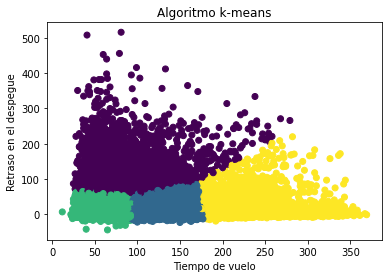

In [12]:
# Estan muy mal distribuidos, vamos a visualizarlos con
# un diagrama de burbujas

plt.scatter(newdf["AirTime"], 
            newdf["DepDelay"], 
            c = kmeans.labels_)
plt.xlabel("Tiempo de vuelo")
plt.ylabel("Retraso en el despegue")
plt.title("Algoritmo k-means")

In [18]:
# Coordenadas centroides
kmeans.cluster_centers_

array([[ 79.43978926, 116.1144004 ],
       [128.05041598,   5.11923475],
       [ 58.86808581,   5.6399238 ],
       [224.66299613,  10.01851404]])

In [22]:
# Vamos a clasificar todos los vuelos de la base de datos

alldf = pd.read_csv("/Users/javlintor/Downloads/base_datos_2008.csv.bz2", nrows = 1e6)
alldf = alldf[["AirTime","DepDelay"]].dropna()

kmeans.predict(alldf)[0:50]

array([1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 0, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0], dtype=int32)